# Riskfolio-Lib Tutorial: 
<br><a href="https://www.kqzyfj.com/click-101360347-15150084?url=https%3A%2F%2Flink.springer.com%2Fbook%2F9783031843037" target="_blank">
<div>
<img src="https://raw.githubusercontent.com/dcajasn/Riskfolio-Lib/refs/heads/master/docs/source/_static/Button.png" height="40" />
</div>
<br>
</a>
<a href="https://www.paypal.com/ncp/payment/GN55W4UQ7VAMN" target="_blank">
<div>
<img src="https://raw.githubusercontent.com/dcajasn/Riskfolio-Lib/refs/heads/master/docs/source/_static/Button2.png" height="40" />
</div>
</a>

<br><a href='https://ko-fi.com/B0B833SXD' target='_blank'><img height='36' style='border:0px;height:36px;' src='https://cdn.ko-fi.com/cdn/kofi1.png?v=2' border='0' alt='Buy Me a Coffee at ko-fi.com' /></a> 
<br>
<br>__[Financionerioncios](https://financioneroncios.wordpress.com)__
<br>__[Orenji](https://www.linkedin.com/company/orenj-i)__
<br>__[Riskfolio-Lib](https://riskfolio-lib.readthedocs.io/en/latest/)__
<br>__[Dany Cajas](https://www.linkedin.com/in/dany-cajas/)__

## Tutorial 48: Classic Mean Variance Optimization with Risk Contribution Inequalities Constraints

## 1. Downloading the data:

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2016-01-01'
end = '2019-12-30'

# Tickers of assets
assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end, auto_adjust=False)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%***********************]  25 of 25 completed


In [2]:
# Calculating returns

Y = data[assets].pct_change().dropna()

display(Y.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-05,-2.0257%,0.4057%,0.4035%,1.9693%,0.0180%,0.9305%,0.3678%,0.5784%,0.9483%,-1.1953%,...,1.5881%,0.0212%,2.8236%,0.9758%,0.6987%,1.7539%,-0.1730%,0.2409%,1.3735%,-1.0857%
2016-01-06,-11.4863%,-1.5879%,0.2411%,-1.7557%,-0.7726%,-1.2473%,-0.1736%,-1.1239%,-3.5867%,-0.9551%,...,0.5548%,0.0212%,0.1592%,-1.5646%,0.3108%,-1.0155%,-0.7653%,-3.0048%,-0.9034%,-2.9144%
2016-01-07,-5.1389%,-4.1922%,-1.6573%,-2.7699%,-1.1047%,-1.9769%,-1.2206%,-0.8856%,-4.6058%,-2.5394%,...,-2.2067%,-3.0310%,-1.0411%,-3.1557%,-1.6148%,-0.2700%,-2.2844%,-2.0570%,-0.5492%,-3.0019%
2016-01-08,0.2736%,-2.2705%,-1.6037%,-2.5425%,0.1099%,-0.2241%,0.5706%,-1.6402%,-1.7641%,-0.1649%,...,-0.1538%,-1.1366%,-0.7307%,-0.1448%,0.0895%,-3.3839%,-0.1117%,-1.1387%,-0.9719%,-1.1254%
2016-01-11,-4.3383%,0.1692%,-1.6851%,-1.0215%,0.0915%,-1.1791%,0.5674%,0.5288%,0.6616%,0.0330%,...,1.6436%,0.0000%,0.9869%,-0.1450%,1.2225%,1.4570%,0.5367%,-0.4607%,0.5799%,-1.9919%


## 2. Estimating Mean Variance Portfolios

### 2.1 Calculating the portfolio that maximizes Sharpe ratio.

In [3]:
import riskfolio as rp

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,6.1591%,11.5019%,0.0000%,0.0000%,8.4808%,0.0000%,3.8196%,0.0000%,0.0000%,...,10.8257%,0.0000%,0.0000%,0.0000%,0.0000%,7.1804%,0.0000%,0.0000%,4.2746%,0.0000%


### 2.2 Plotting portfolio composition

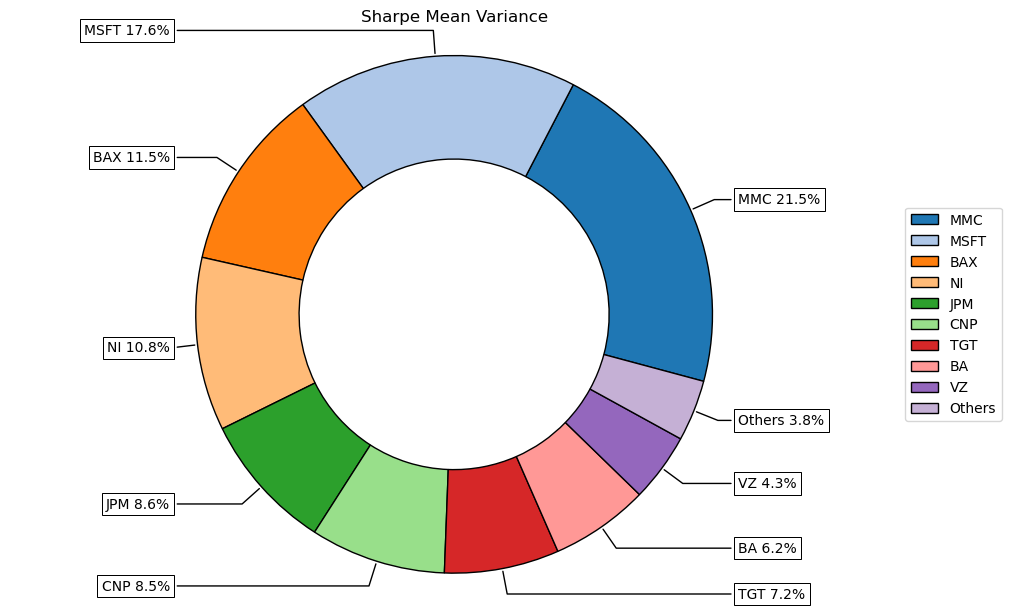

In [4]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(
    w=w,
    title='Sharpe Mean Variance',
    others=0.05,
    nrow=25,
    cmap="tab20",
    height=6,
    width=10,
    ax=None)

### 2.3 Plotting risk contribution

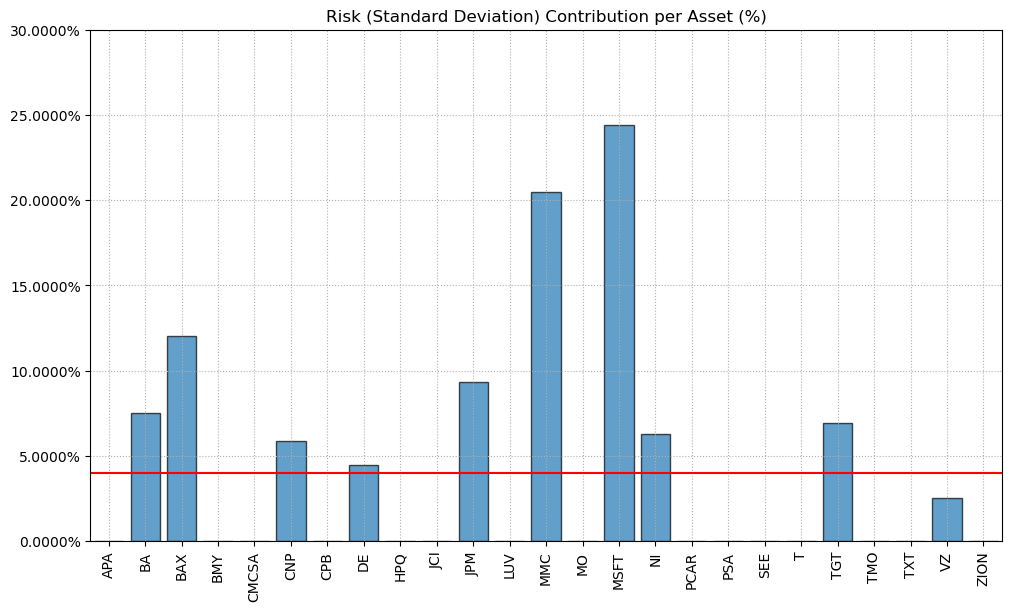

In [5]:
# Plotting the risk composition of the portfolio

ax = rp.plot_risk_con(
    w,
    cov=port.cov,
    returns=port.returns,
    rm=rm,
    rf=0,
    alpha=0.05,
    color="tab:blue",
    percentage=True,
    height=6,
    width=10,
    ax=None)

## 3. Constraints on Assets and Assets Classes

### 3.1 Creating the constraints

In this part I use dictionaries to create the constraints but is prefered to create the tables in excel and upload them with pandas.read_excel.

In [6]:
asset_classes = {'Assets': ['JCI','TGT','CMCSA','CPB','MO','APA','MMC','JPM',
                            'ZION','PSA','BAX','BMY','LUV','PCAR','TXT','TMO',
                            'DE','MSFT','HPQ','SEE','VZ','CNP','NI','T','BA'], 
                 'Industry': ['Consumer Discretionary','Consumer Discretionary',
                              'Consumer Discretionary', 'Consumer Staples',
                              'Consumer Staples','Energy','Financials',
                              'Financials','Financials','Financials',
                              'Health Care','Health Care','Industrials','Industrials',
                              'Industrials','Health Care','Industrials',
                              'Information Technology','Information Technology',
                              'Materials','Telecommunications Services','Utilities',
                              'Utilities','Telecommunications Services','Financials']}

asset_classes = pd.DataFrame(asset_classes)
asset_classes = asset_classes.sort_values(by=['Assets'])

constraints = {'Disabled': [False, False, False, False, False],
               'Type': ['All Assets', 'Classes', 'Classes', 'Classes',
                        'Classes'],
               'Set': ['', 'Industry', 'Industry', 'Industry', 'Industry'],
               'Position': ['', 'Financials', 'Utilities', 'Industrials',
                            'Consumer Discretionary'],
               'Sign': ['<=', '<=', '<=', '<=', '<='],
               'Weight': [0.10, 0.2, 0.2, 0.2, 0.2],
               'Type Relative': ['', '', '', '', ''],
               'Relative Set': ['', '', '', '', ''],
               'Relative': ['', '', '', '', ''],
               'Factor': ['', '', '', '', '']}

constraints = pd.DataFrame(constraints)

display(constraints)

,Disabled,Type,Set,Position,Sign,Weight,Type Relative,Relative Set,Relative,Factor
0,False,All Assets,,,<=,10.0000%,,,,
1,False,Classes,Industry,Financials,<=,20.0000%,,,,
2,False,Classes,Industry,Utilities,<=,20.0000%,,,,
3,False,Classes,Industry,Industrials,<=,20.0000%,,,,
4,False,Classes,Industry,Consumer Discretionary,<=,20.0000%,,,,


In [7]:
A, B = rp.assets_constraints(constraints, asset_classes)

### 3.2 Optimize the portfolio with the linear constraints

In [8]:
port.ainequality = A
port.binequality = B

model = 'Classic'
rm = 'MV'
obj = 'Sharpe'
rf = 0

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,3.7276%,10.0000%,0.0000%,1.7585%,10.0000%,0.0000%,9.0763%,0.0000%,0.0000%,...,10.0000%,0.0000%,0.0000%,0.0000%,0.0023%,9.4401%,9.7228%,0.0000%,10.0000%,0.0000%


### 3.3 Plotting portfolio composition

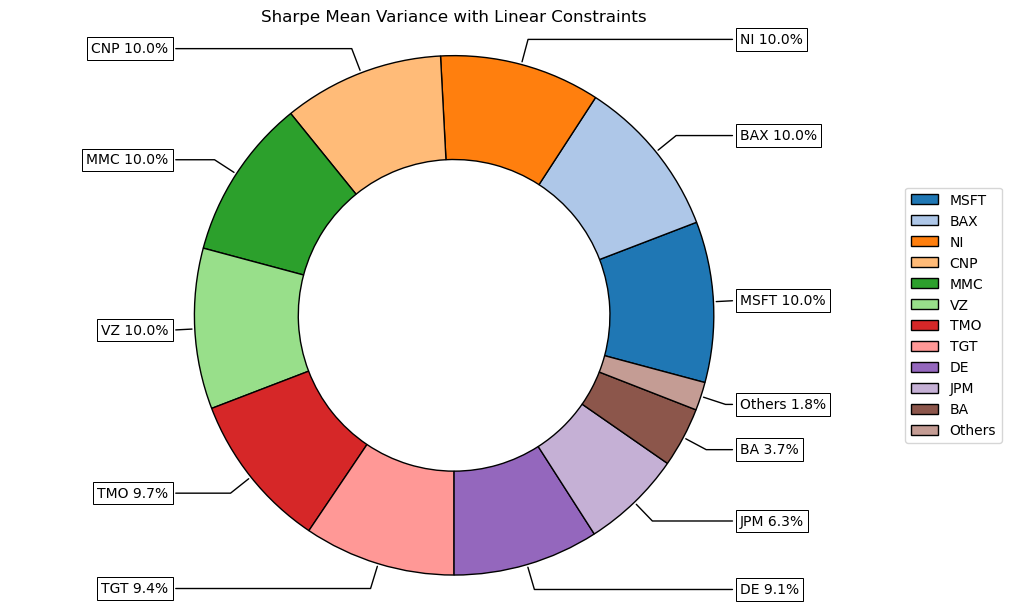

In [9]:
ax = rp.plot_pie(
    w=w,
    title='Sharpe Mean Variance with Linear Constraints',
    others=0.05,
    nrow=25,
    cmap="tab20",
    height=6,
    width=10,
    ax=None)

### 3.4 Plotting portfolio composition per class

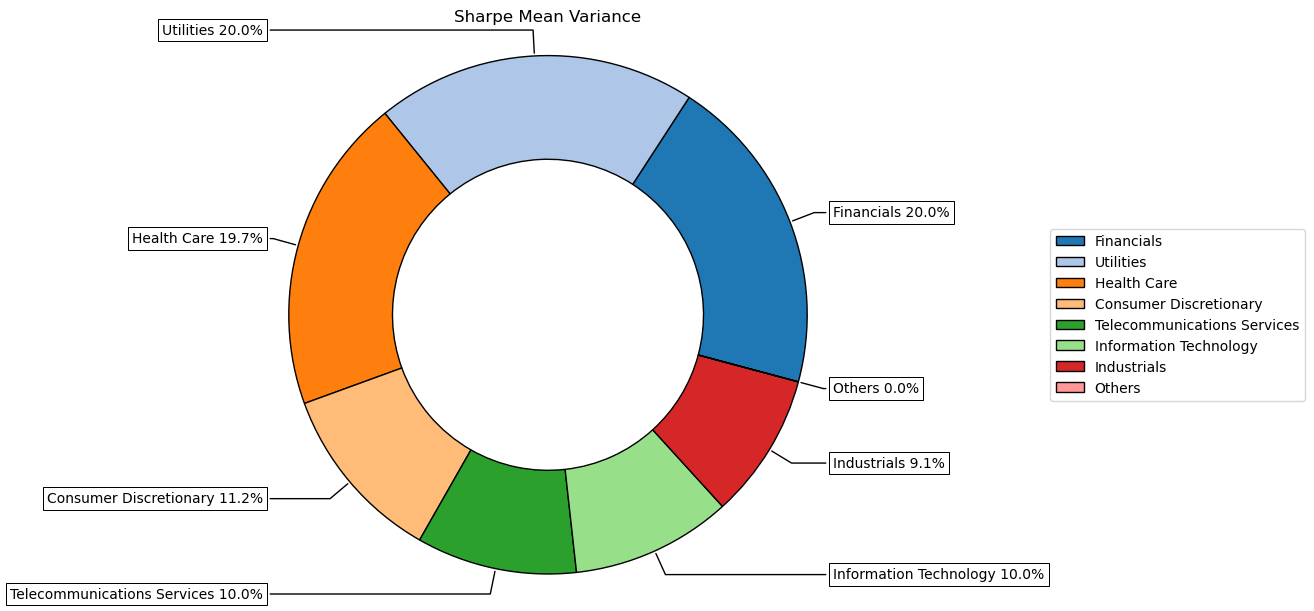

In [10]:
w_classes = pd.concat([asset_classes.set_index('Assets'), w], axis=1)
w_classes = w_classes.groupby(['Industry']).sum()

ax = rp.plot_pie(
    w=w_classes,
    title='Sharpe Mean Variance',
    others=0.05,
    nrow=25,
    cmap = "tab20",
    height=6,
    width=13,
    ax=None)

### 3.5 Plotting risk contribution

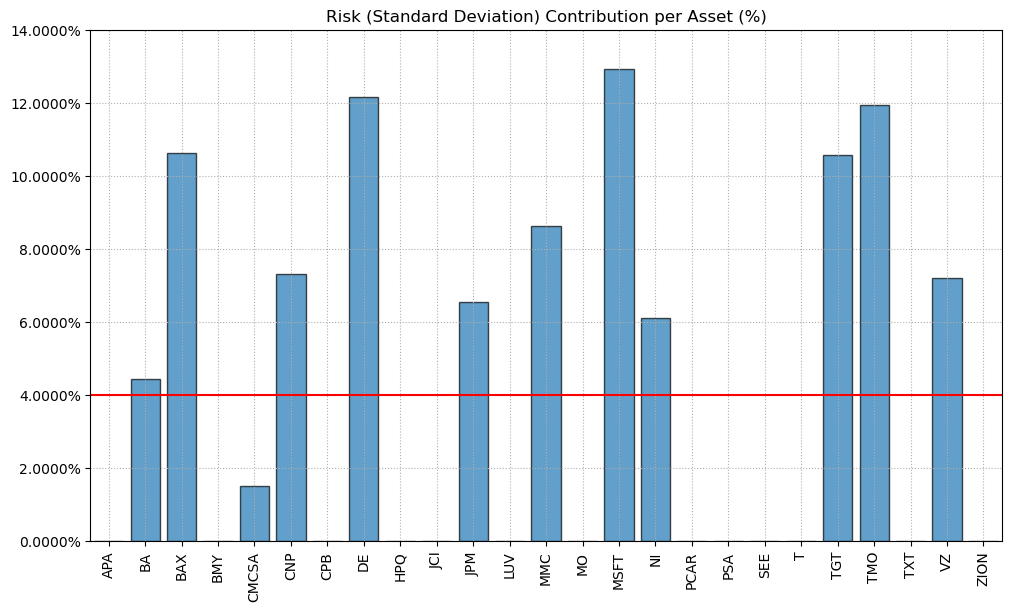

In [11]:
# Plotting the risk composition of the portfolio

ax = rp.plot_risk_con(
    w,
    cov=port.cov,
    returns=port.returns,
    rm=rm,
    rf=0,
    alpha=0.05,
    color="tab:blue",
    percentage=True,
    height=6,
    width=10,
    ax=None)

### 3.6 Plotting risk contribution per class

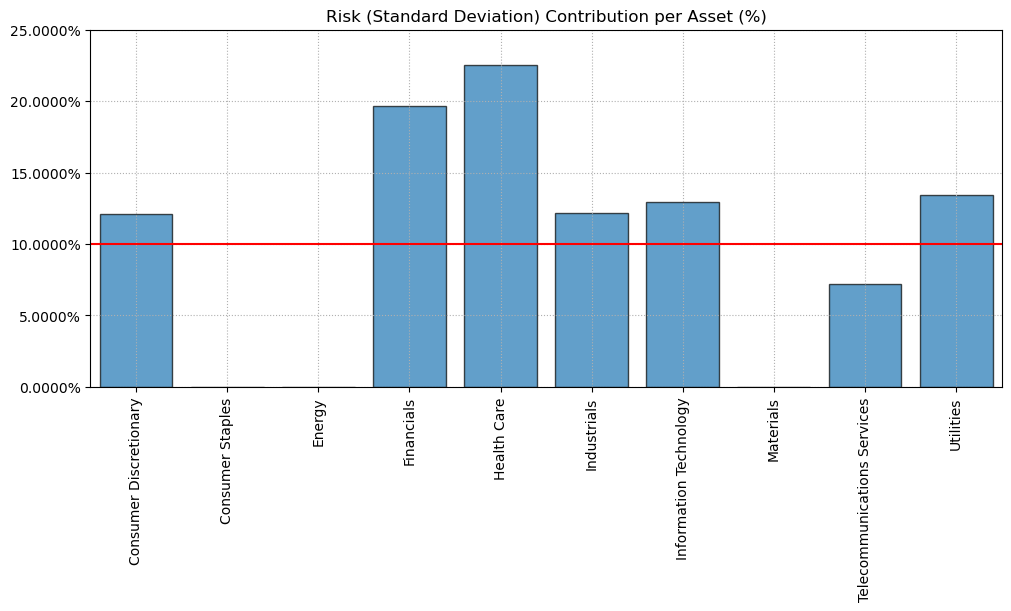

In [12]:
ax = rp.plot_risk_con(
    w,
    cov=port.cov,
    returns=port.returns,
    asset_classes=asset_classes,
    classes_col='Industry',
    rm=rm,
    rf=0,
    alpha=0.05,
    color="tab:blue",
    percentage=True,
    height=6,
    width=10,
    ax=None)

### 3.7 Optimize the portfolio with the linear risk contribution constraints

In [13]:
port.ainequality = None
port.binequality = None
port.arcinequality = A
port.brcinequality = B

model = 'Classic'
rm = 'MV'
obj = 'Sharpe'
rf = 0

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,1.9468%,9.2114%,0.0000%,2.6682%,11.1994%,1.6682%,5.0586%,0.0000%,0.0025%,...,12.5426%,0.0000%,0.8270%,0.0000%,5.1624%,8.2502%,4.9419%,0.0000%,11.1395%,0.0000%


### 3.8 Plotting portfolio composition

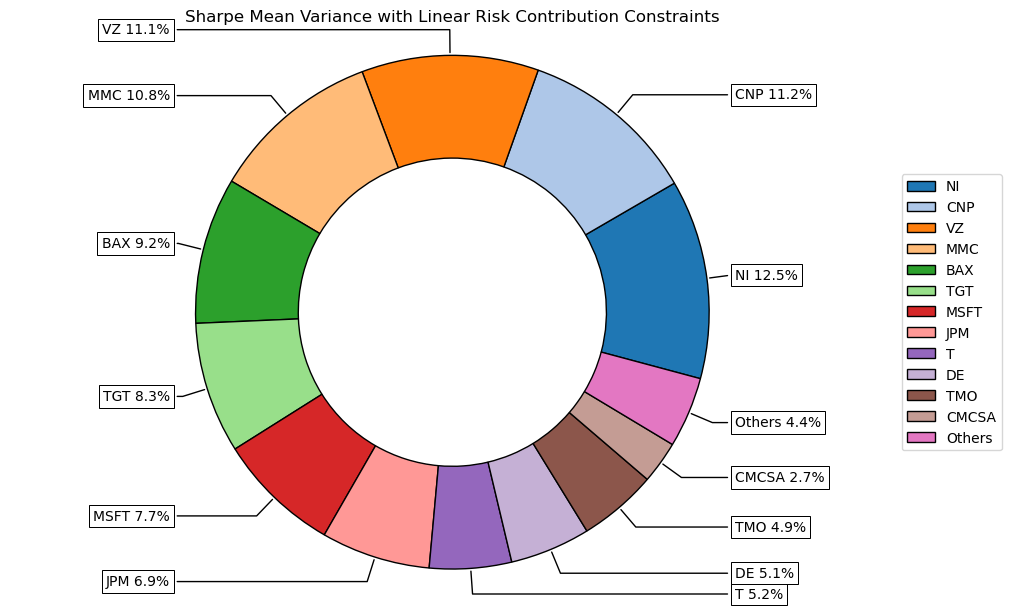

In [14]:
ax = rp.plot_pie(
    w=w,
    title='Sharpe Mean Variance with Linear Risk Contribution Constraints',
    others=0.05,
    nrow=25,
    cmap="tab20",
    height=6,
    width=10,
    ax=None)

### 3.9 Plotting portfolio composition per class

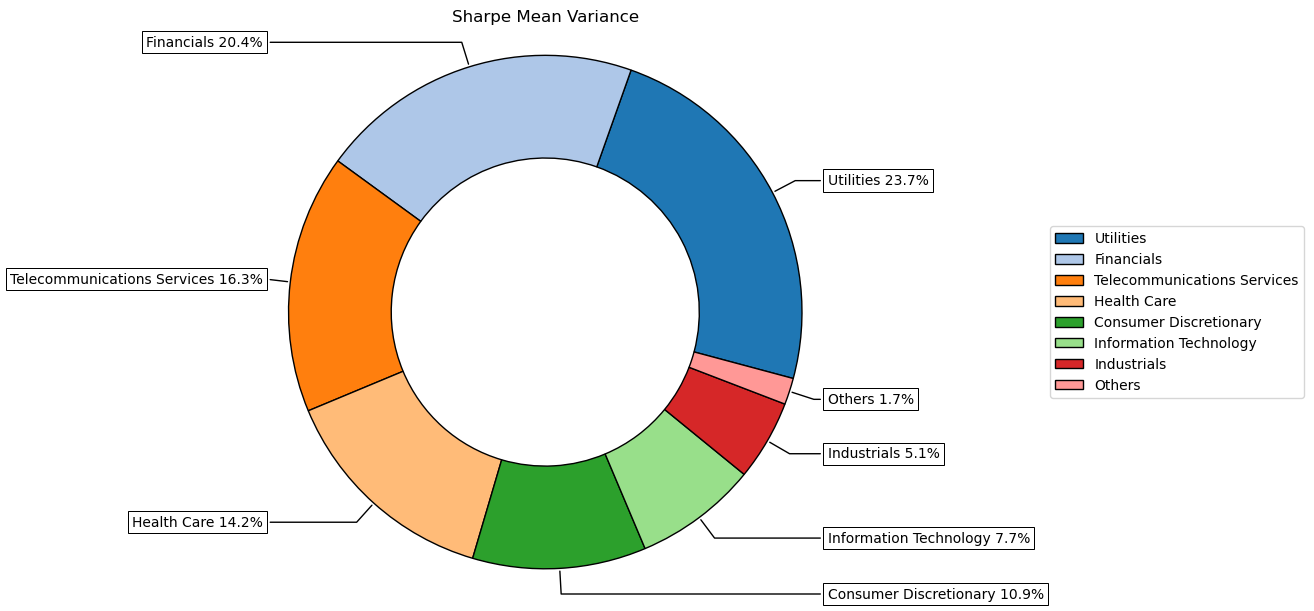

In [15]:
w_classes = pd.concat([asset_classes.set_index('Assets'), w], axis=1)
w_classes = w_classes.groupby(['Industry']).sum()

ax = rp.plot_pie(
    w=w_classes,
    title='Sharpe Mean Variance',
    others=0.05,
    nrow=25,
    cmap = "tab20",
    height=6,
    width=13,
    ax=None)

### 3.10 Plotting risk contribution

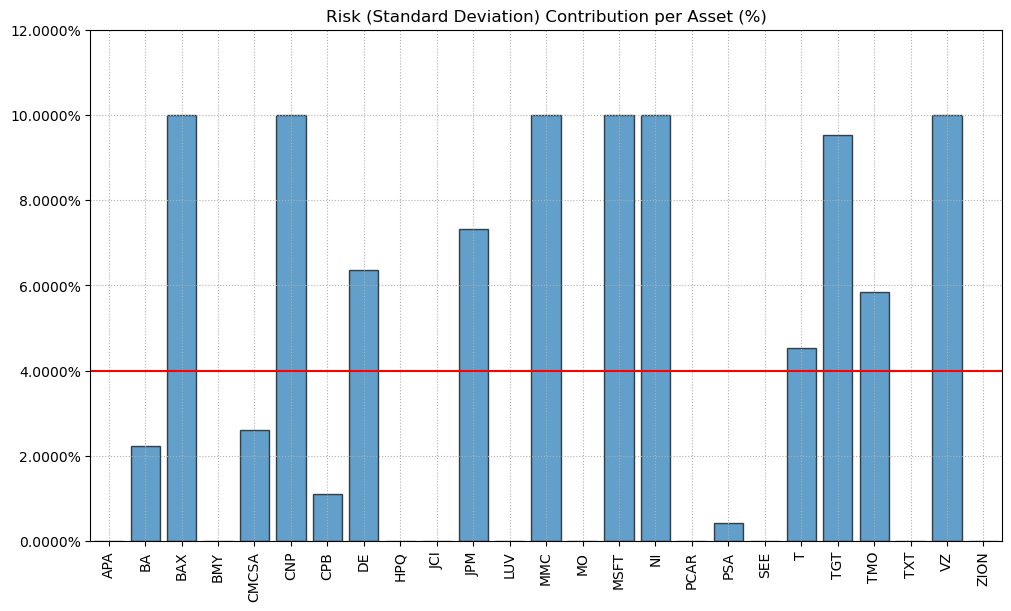

In [16]:
# Plotting the risk composition of the portfolio

ax = rp.plot_risk_con(
    w,
    cov=port.cov,
    returns=port.returns,
    rm=rm,
    rf=0,
    alpha=0.05,
    color="tab:blue",
    percentage=True,
    height=6,
    width=10,
    ax=None)

### 3.11 Plotting risk contribution per class

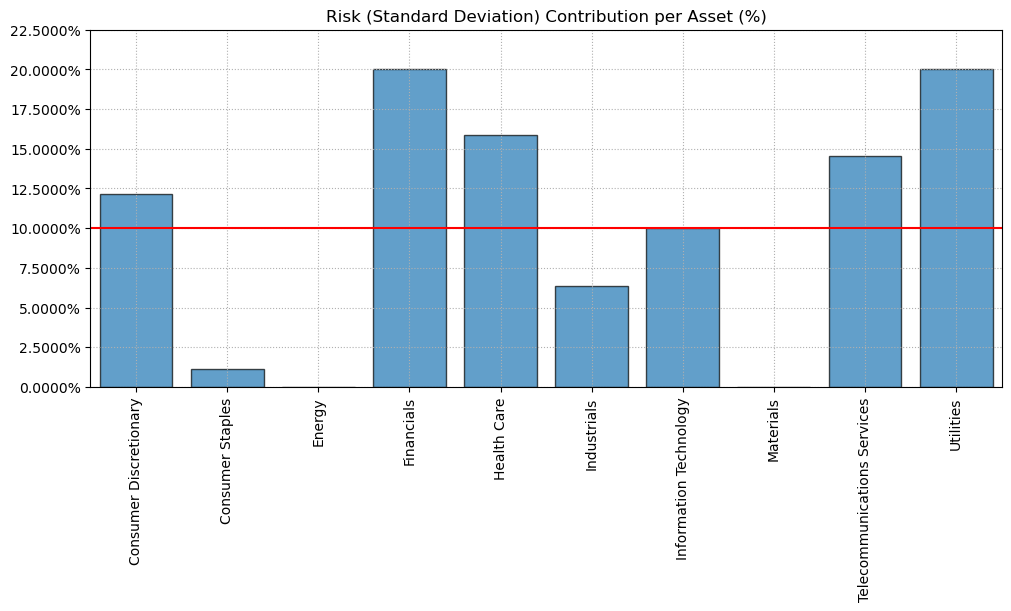

In [17]:
ax = rp.plot_risk_con(
    w,
    cov=port.cov,
    returns=port.returns,
    asset_classes=asset_classes,
    classes_col='Industry',
    rm=rm,
    rf=0,
    alpha=0.05,
    color="tab:blue",
    percentage=True,
    height=6,
    width=10,
    ax=None)